In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv('abengoa.csv')

In [16]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2009-02-11,12.97,13.04,12.97,12.98,0
1,2009-02-12,12.40,13.08,12.40,13.08,0
2,2009-02-13,12.72,12.93,12.72,12.80,0
3,2009-02-16,12.56,12.80,12.56,12.59,0
4,2009-02-17,11.90,12.67,11.90,12.43,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2604 non-null   object 
 1   Close   2604 non-null   float64
 2   High    2604 non-null   float64
 3   Low     2604 non-null   float64
 4   Open    2604 non-null   float64
 5   Volume  2604 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 122.2+ KB


In [86]:
df.describe()

,Close,High,Low,Open,Volume
count,2604.000000,2604.000000,2604.000000,2604.000000,2.604000e+03
mean,5.843349,5.941249,5.749406,5.854279,5.694887e+06
std,7.563552,7.659404,7.465842,7.570963,1.951586e+07
min,0.010600,0.011000,0.010000,0.010800,0.000000e+00
25%,0.449250,0.470000,0.426000,0.448750,1.899100e+05
50%,2.454500,2.519000,2.407500,2.466000,4.682650e+05
75%,4.629000,4.732500,4.532500,4.647750,1.422500e+06
max,24.000000,24.340000,23.590000,24.190000,3.625500e+08


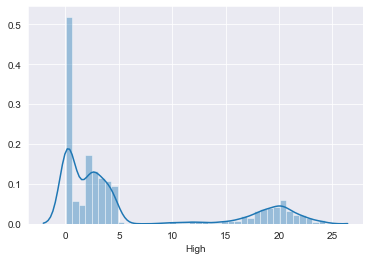

In [90]:
sns.distplot(df['High'])

In [36]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

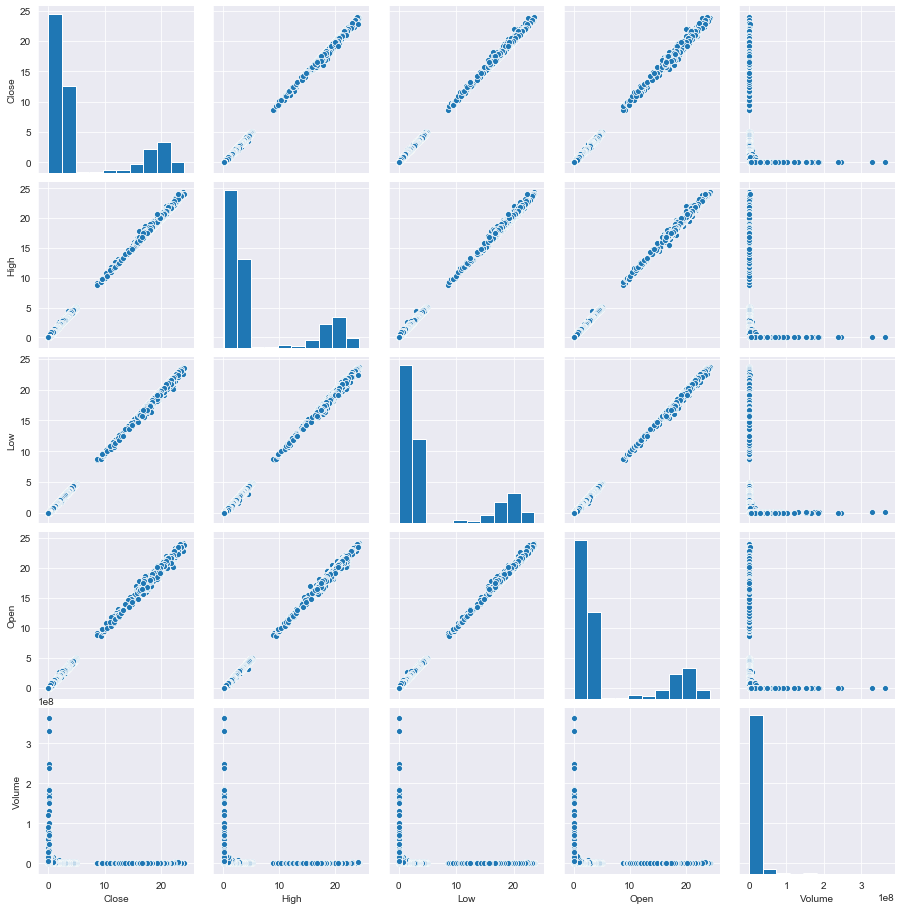

In [19]:
sns.pairplot(data = df)

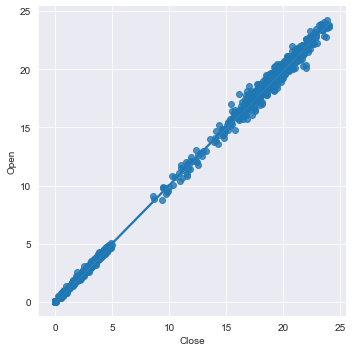

In [24]:
sns.lmplot(data = df,x = 'Close',y = 'Open')

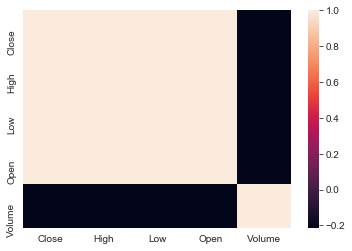

In [31]:
sns.heatmap(df.corr())

In [113]:
# applying the ML
X = df[['Close', 'High', 'Low','Volume']]
y = df['Open']

In [159]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [160]:
lm = LinearRegression()

In [161]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
lm.coef_

array([-6.89713033e-01,  7.78525735e-01,  9.13927565e-01, -5.52237476e-11])

In [163]:
lm.intercept_

0.004556562456687452

In [164]:
lm.score(x_train,y_train)

0.9997953477975765

In [169]:
predict = lm.predict(x_test)
predict[100]

1.803414792387142

In [168]:
y_test[100]

19.29

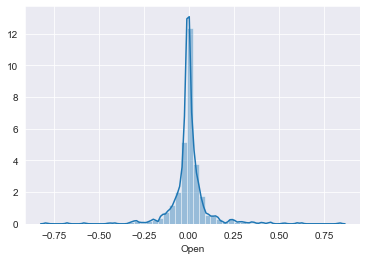

In [167]:
sns.distplot(y_test-predict)

In [137]:
pd.DataFrame(lm.coef_,x_train.columns,columns = ['Coeff'])

,Coeff
Close,-6.731344e-01
High,7.695116e-01
Low,9.063712e-01
Volume,-5.942618e-11


In [138]:
from sklearn import metrics

In [139]:
metrics.mean_absolute_error(y_test,predict)

0.052699350037854746

In [140]:
metrics.mean_squared_error(y_test,predict)

0.010833722591404136

In [141]:
np.sqrt(metrics.mean_squared_error(y_test,predict))

0.10408516989179648